# Load data

Load data and replace NULL value to average data for field. Our data with UNKNOWN items(key=-9999) we ignore because we want to receive model for analysing data which would be insert correct. 

In [1]:
from sklearn import  cross_validation, grid_search, linear_model, metrics

import numpy as np
import pandas as pd

import mysql.connector
from mysql.connector import errorcode

C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
cnx = mysql.connector.connect(user='sena', password='qWERtYhGfDsA12#', host='10.3.99.94', database='bookstore')
cursor = cnx.cursor()

query = ("with cte(countryid, Age, publisherID, balance, Raiting) as( "
"select dc.countryid, du.Age, db.publisherID, "
"row_number() over (partition by `Book-Rating`) balance, "
" `Book-Rating` as Raiting "
" from factrating f  "
" left join DimUsers du on (f.userid=du.userid) left join Dimcity dct on (du.cityid=dct.cityid) "
" left join DimState ds on (dct.stateid = ds.stateid) "
"left join Dimcountry dc on (ds.countryid=dc.countryid) "
"left join DimBooks db on (db.ISBN=f.isbn) "
"where dc.countryid>0 and db.publisherid >0) "
"select countryid, Age, publisherID, Raiting from cte "
"where balance<1000; "        
)
 
cursor.execute(query)

from pandas import DataFrame
df = DataFrame(cursor.fetchall())
df.columns = ('countryid', 'Age', 'publisherID', 'Raiting')


cursor.close()
cnx.close()

In [55]:
print df.shape

(10989, 4)


In [56]:
df.isnull().values.any()

True

In [57]:
#replace null value to average. 
df['Age']=df['Age'].apply(lambda x:np.mean(df['Age']) if pd.isnull(x) else x)
df.isnull().values.any()

False

In [58]:
#save data
df.to_csv("buffer2.csv")

# Learning model

In [59]:
#load dat
import pandas as pd

t=pd.read_csv("buffer2.csv")
df =t[:100000].drop('Unnamed: 0', 1)

In [60]:
TRAIN_SIZE = 0.7 
from sklearn.cross_validation import train_test_split

y=df['Raiting'].values


#numerical field
num =df[['Age']]

In [61]:
categorical_cols=['countryid', 'publisherID']#'countryid', 'publisherID'
#categorical field
#cat = df[['countryid', 'publisherID']]
# String Value
cat=pd.DataFrame()
for it in range(len(categorical_cols)):
    cat[categorical_cols[it]]=df.loc[:,categorical_cols[it]].fillna(value = 'NA')
    #obligatory to transform to STRING
    cat[categorical_cols[it]]=cat[categorical_cols[it]].astype('str')


#turn field into value of matrix
from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer(sparse = False)
enc_data = enc.fit_transform(cat.T.to_dict().values())
crat = pd.DataFrame(enc_data,  columns=enc.get_feature_names())

In [69]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692
2436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
3750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000
10417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.140675
3583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
1141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.140675
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.140675
9300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000
10867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.000000
5756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000
914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000


In [70]:
X  = pd.DataFrame(np.hstack((crat, num)))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

Text(0.5,1,'test data')

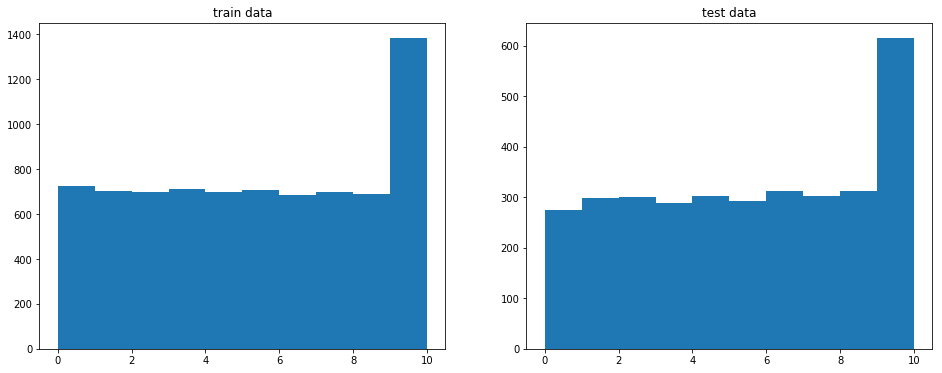

In [72]:
pylab.figure(figsize=(16,6))

pylab.subplot(1,2,1)
pylab.hist(y_train)
pylab.title ('train data')

pylab.subplot(1,2,2)
pylab.hist(y_test)
pylab.title ('test data')


**Pipeline:**

In [66]:
from sklearn import cross_validation, grid_search, linear_model, metrics 
from sklearn import pipeline, preprocessing

In [73]:
numeric_data_columns=[1692]
numeric_data_indeces=np.array([(column in numeric_data_columns) for column in X_train.columns], dtype=bool)
print numeric_data_columns 
print numeric_data_indeces

[1692]
[False False False ... False False  True]


In [74]:
categorical_data_columns=list(set(X.columns.values.tolist()) - set(numeric_data_columns))
categorical_data_indeces=np.array([(column in categorical_data_columns) for column in X_train.columns], dtype=bool)
print categorical_data_columns 
print categorical_data_indeces

[0L, 1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 13L, 14L, 15L, 16L, 17L, 18L, 19L, 20L, 21L, 22L, 23L, 24L, 25L, 26L, 27L, 28L, 29L, 30L, 31L, 32L, 33L, 34L, 35L, 36L, 37L, 38L, 39L, 40L, 41L, 42L, 43L, 44L, 45L, 46L, 47L, 48L, 49L, 50L, 51L, 52L, 53L, 54L, 55L, 56L, 57L, 58L, 59L, 60L, 61L, 62L, 63L, 64L, 65L, 66L, 67L, 68L, 69L, 70L, 71L, 72L, 73L, 74L, 75L, 76L, 77L, 78L, 79L, 80L, 81L, 82L, 83L, 84L, 85L, 86L, 87L, 88L, 89L, 90L, 91L, 92L, 93L, 94L, 95L, 96L, 97L, 98L, 99L, 100L, 101L, 102L, 103L, 104L, 105L, 106L, 107L, 108L, 109L, 110L, 111L, 112L, 113L, 114L, 115L, 116L, 117L, 118L, 119L, 120L, 121L, 122L, 123L, 124L, 125L, 126L, 127L, 128L, 129L, 130L, 131L, 132L, 133L, 134L, 135L, 136L, 137L, 138L, 139L, 140L, 141L, 142L, 143L, 144L, 145L, 146L, 147L, 148L, 149L, 150L, 151L, 152L, 153L, 154L, 155L, 156L, 157L, 158L, 159L, 160L, 161L, 162L, 163L, 164L, 165L, 166L, 167L, 168L, 169L, 170L, 171L, 172L, 173L, 174L, 175L, 176L, 177L, 178L, 179L, 180L, 181L, 182L, 183L, 184L,

In [75]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692
2436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
3750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000
10417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.140675
3583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
1141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.140675


In [76]:
regressor = linear_model.SGDRegressor(random_state=0
                                         , n_iter=3
                                         , loss='squared_loss'
                                         , penalty='l2')

C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [77]:
estimator = pipeline.Pipeline(steps = [
        ('feature_processing', pipeline.FeatureUnion(transformer_list=[
        #numeric 
        ('numeric_variables_processing', pipeline.Pipeline(steps=[
                  ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indeces])),
                  ('scaling', preprocessing.StandardScaler(with_mean = 0.)) 
                            ])),
        #categorical тут отделим затем преобразовываем в нумерический вид наши категории (hot_encoding) 
        ('categorical_variables_processing', pipeline.Pipeline(steps =[
                  ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indeces])),
                  ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))   
                            ]))
          ])),
        ('model_fitting', regressor)])


In [78]:
#обучаем
estimator.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_variables_processing', Pipeline(memory=None,
     steps=[('selecting', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x00000000107F9EB8>, inv_kw_args=None,
          inverse_func=N...,
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))])

In [79]:
metrics.mean_absolute_error(y_test, estimator.predict(X_test))

12099251442.305159

In [97]:
print y_test[:10]
print estimator.predict(X_test)[:10]

[10  5  6  8  9  8  8  8  7  5]
[3.35626563 3.61571848 3.69675435 3.57571848 3.61571848 3.70494925
 3.70544042 3.41742962 3.43742962 3.61571848]


**Optimal parameters**

In [80]:
estimator.get_params().keys()

['feature_processing__numeric_variables_processing__selecting__kw_args',
 'model_fitting__learning_rate',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'feature_processing__categorical_variables_processing__selecting__kw_args',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__transformer_weights',
 'feature_processing__categorical_variables_processing__hot_encoding__n_values',
 'model_fitting__fit_intercept',
 'feature_processing__numeric_variables_processing__selecting__inverse_func',
 'feature_processing',
 'model_fitting__epsilon',
 'feature_processing__categorical_variables_processing__hot_encoding__handle_unknown',
 'model_fitting__l1_ratio',
 'feature_processing__categorical_variables_processing__selecting__validate',
 'feature_processing__transformer_list',
 'feature_processing__numeric_variables_processing__st

In [81]:
parameters_grid={
    'model_fitting__alpha':[0.0001, 0.001, 0.1],
    'model_fitting__eta0':[0.001, 0.05],
}

In [82]:
grid_cv=grid_search.GridSearchCV(estimator, parameters_grid, scoring='mean_absolute_error', cv=4)

In [83]:
%%time
grid_cv.fit(X_train, y_train)

C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWar

Wall time: 39.2 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_variables_processing', Pipeline(memory=None,
     steps=[('selecting', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x00000000107F9EB8>, inv_kw_args=None,
          inverse_func=N...,
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model_fitting__eta0': [0.001, 0.05], 'model_fitting__alpha': [0.0001, 0.001, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [84]:
#Result from setup parameters of model:

print grid_cv.best_score_
print grid_cv.best_params_

-2.93423149265
{'model_fitting__eta0': 0.001, 'model_fitting__alpha': 0.1}


In [85]:
test_prediction=grid_cv.best_estimator_.predict(X_test)
metrics.mean_absolute_error(y_test, test_prediction)

2.735640421367088

(-1, 11)

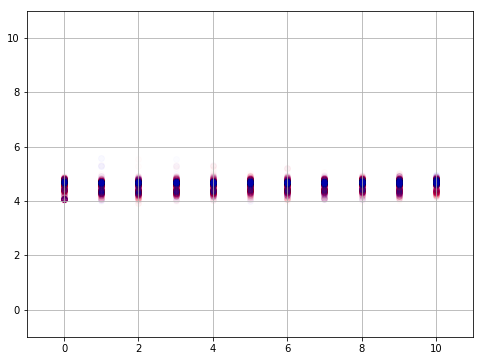

In [86]:
pylab.figure(figsize(8, 6))

pylab.grid(True)
pylab.scatter(y_train, grid_cv.best_estimator_.predict(X_train), alpha=0.01, color='red')
pylab.scatter(y_test, grid_cv.best_estimator_.predict(X_test), alpha=0.01, color='blue')
pylab.xlim(-1, 11)
pylab.ylim(-1, 11)

In [88]:
print y_test[:10]
print grid_cv.best_estimator_.predict(X_test)[:10]

[10  5  6  8  9  8  8  8  7  5]
[4.18319479 4.69009226 4.39822391 4.72076795 4.60325389 4.72782458
 4.43920128 4.40989664 4.45429117 4.69765629]


# Random Forest

In [89]:
# модель случайный лес
from sklearn.ensemble import RandomForestRegressor

C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [90]:
regressor = RandomForestRegressor(random_state=0, 
                                  max_depth=20, 
                                  n_estimators=50)

In [91]:
# повторим преобразования
estimator = pipeline.Pipeline(steps = [
        ('feature_processing', pipeline.FeatureUnion(transformer_list=[
        #numeric 
        ('numeric_variables_processing', pipeline.Pipeline(steps=[
                  ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indeces])),
                  ('scaling', preprocessing.StandardScaler(with_mean = 0.)) 
                            ])),
        #categorical преобразовываем в нумерический вид наши категории (hot_encoding) 
        ('categorical_variables_processing', pipeline.Pipeline(steps =[
                  ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indeces])),
                  ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))   
                            ]))
          ])),
        ('model_fitting', regressor)])

In [98]:
estimator.fit(X_train, y_train)

metrics.mean_absolute_error(y_test, estimator.predict(X_test))

2.4735455037164575

In [93]:
#кажется лучше
print y_test[:10]
print estimator.predict(X_test)[:10]

[10  5  6  8  9  8  8  8  7  5]
[6.30205017 6.61308943 4.70880021 4.9736921  5.18907351 5.41014491
 5.97771789 4.64683348 6.43164422 4.98092201]


(-1, 11)

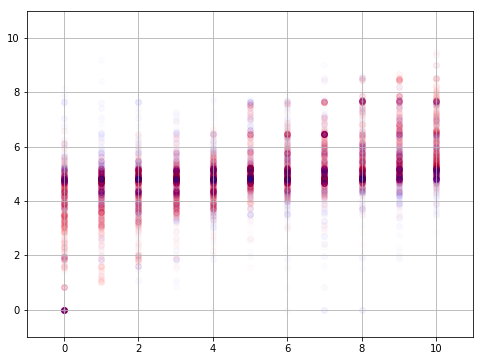

In [94]:
pylab.figure(figsize(8, 6))

pylab.grid(True)
pylab.scatter(y_train, estimator.predict(X_train), alpha=0.01, color='red')
pylab.scatter(y_test, estimator.predict(X_test), alpha=0.01, color='blue')
pylab.xlim(-1, 11)
pylab.ylim(-1, 11)